In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load dataset
df = pd.read_csv("Data collected Jan-Aug 2024.csv")

In [4]:
# Create a product-user matrix
product_user_matrix = df.pivot_table(index='Customer ID', columns='Product ID', values='Quantity', aggfunc='sum', fill_value=0)
product_user_matrix

Product ID,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,P091,P092,P093,P094,P095,P096,P097,P098,P099,P100
Customer ID,,,,,,,,,,,,,,,,,,,,,
C001,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
C002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C003,0,0,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
C004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C005,0,0,6,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C996,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C997,0,0,1,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Convert to binary format (purchase or not)
product_user_matrix = product_user_matrix.applymap(lambda x: 1 if x > 0 else 0)
product_user_matrix

<ipython-input-5-735beaeb8081>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  product_user_matrix = product_user_matrix.applymap(lambda x: 1 if x > 0 else 0)


Product ID,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,P091,P092,P093,P094,P095,P096,P097,P098,P099,P100
Customer ID,,,,,,,,,,,,,,,,,,,,,
C001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
C002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C003,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
C004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C005,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C996,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C997,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Compute Co-occurrence Matrix
co_occurrence_matrix = np.dot(product_user_matrix.T, product_user_matrix)
co_occurrence_matrix

array([[48,  4,  1, ...,  4,  4,  0],
       [ 4, 52,  3, ...,  3,  2,  3],
       [ 1,  3, 54, ...,  1,  4,  4],
       ...,
       [ 4,  3,  1, ..., 49,  0,  2],
       [ 4,  2,  4, ...,  0, 46,  2],
       [ 0,  3,  4, ...,  2,  2, 47]])

In [7]:
# Convert to DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=product_user_matrix.columns, columns=product_user_matrix.columns)
co_occurrence_df

Product ID,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,P091,P092,P093,P094,P095,P096,P097,P098,P099,P100
Product ID,,,,,,,,,,,,,,,,,,,,,
P001,48,4,1,0,2,1,3,3,0,0,...,0,4,5,3,4,1,0,4,4,0
P002,4,52,3,4,0,2,2,5,1,3,...,2,3,1,3,2,0,3,3,2,3
P003,1,3,54,3,6,4,5,1,8,1,...,1,2,4,0,2,4,4,1,4,4
P004,0,4,3,43,0,3,2,0,3,3,...,3,3,1,3,3,0,1,0,2,2
P005,2,0,6,0,40,2,3,2,4,2,...,0,1,2,0,4,4,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P096,1,0,4,0,4,1,1,1,3,3,...,3,1,4,2,2,40,1,3,2,3
P097,0,3,4,1,0,0,4,0,1,3,...,2,2,3,2,4,1,52,1,0,1
P098,4,3,1,0,2,2,7,1,1,2,...,3,2,3,3,2,3,1,49,0,2


In [9]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(co_occurrence_df)
cosine_sim_df = pd.DataFrame(cosine_sim, index=product_user_matrix.columns, columns=product_user_matrix.columns)
cosine_sim_df

Product ID,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,P091,P092,P093,P094,P095,P096,P097,P098,P099,P100
Product ID,,,,,,,,,,,,,,,,,,,,,
P001,1.000000,0.298626,0.206650,0.209929,0.248750,0.220427,0.316747,0.277685,0.182328,0.166284,...,0.176566,0.301577,0.332819,0.268385,0.303799,0.202989,0.160325,0.308002,0.311171,0.178947
P002,0.298626,1.000000,0.243154,0.313911,0.168557,0.251845,0.266364,0.342105,0.205173,0.245716,...,0.242592,0.264988,0.208820,0.275479,0.243573,0.161443,0.240043,0.281098,0.239462,0.263939
P003,0.206650,0.243154,1.000000,0.278993,0.390722,0.322665,0.360010,0.192497,0.403472,0.194814,...,0.211988,0.240218,0.299197,0.163085,0.255460,0.291005,0.260381,0.210815,0.310156,0.295689
P004,0.209929,0.313911,0.278993,1.000000,0.189045,0.332617,0.279466,0.177825,0.289648,0.277419,...,0.312598,0.286483,0.231750,0.272132,0.306182,0.169723,0.187731,0.191416,0.263494,0.259756
P005,0.248750,0.168557,0.390722,0.189045,1.000000,0.290387,0.332814,0.250338,0.340368,0.240084,...,0.186341,0.205136,0.269994,0.175018,0.325245,0.330920,0.181189,0.269693,0.202523,0.222850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P096,0.202989,0.161443,0.291005,0.169723,0.330920,0.224218,0.230371,0.208753,0.279556,0.257878,...,0.283659,0.190958,0.320596,0.226428,0.236079,1.000000,0.181401,0.274673,0.234539,0.276694
P097,0.160325,0.240043,0.260381,0.187731,0.181189,0.179613,0.308201,0.137407,0.199442,0.233419,...,0.221105,0.204383,0.236132,0.231099,0.280575,0.181401,1.000000,0.201453,0.153083,0.192562
P098,0.308002,0.281098,0.210815,0.191416,0.269693,0.259481,0.435599,0.202192,0.219403,0.242673,...,0.291688,0.235742,0.277603,0.276781,0.256593,0.274673,0.201453,1.000000,0.186412,0.250080


In [10]:
# Function to get top-N similar products
def get_similar_products(product_id, n=5):
    if product_id not in cosine_sim_df.index:
        return "Product not found"

    similar_products = cosine_sim_df[product_id].sort_values(ascending=False).iloc[1:n+1]
    return similar_products

In [13]:
# Example usage
product_id_example = 'P001'  # Replace with a valid Product ID
print(get_similar_products(product_id_example))

Product ID
P019    0.393720
P048    0.393682
P059    0.381392
P015    0.344009
P050    0.339512
Name: P001, dtype: float64


In [14]:
# Rank-based Recommendation Function
def rank_based_recommendation(n=5):
    # Calculate total sales for each product
    product_sales = df.groupby('Product ID')['Quantity'].sum()

    # Rank products based on total sales
    ranked_products = product_sales.sort_values(ascending=False).head(n)
    return ranked_products

In [15]:
# Example usage
product_id_example = 'P001'  # Replace with a valid Product ID
print(get_similar_products(product_id_example))
print(rank_based_recommendation())


Product ID
P019    0.393720
P048    0.393682
P059    0.381392
P015    0.344009
P050    0.339512
Name: P001, dtype: float64
Product ID
P080    387
P077    363
P058    336
P017    331
P033    322
Name: Quantity, dtype: int64


In [16]:
# User-based Recommendation Function
def user_based_recommendation(user_id, n=5):
    if user_id not in product_user_matrix.index:
        return "User not found"

    # Compute user similarity
    user_similarity = cosine_similarity(product_user_matrix)
    user_similarity_df = pd.DataFrame(user_similarity, index=product_user_matrix.index, columns=product_user_matrix.index)

    # Get top similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).iloc[1:n+1].index

    # Get products bought by similar users
    similar_users_products = product_user_matrix.loc[similar_users].sum().sort_values(ascending=False).head(n)

    return similar_users_products

In [17]:
# Example usage
product_id_example = 'P001'  # Replace with a valid Product ID
user_id_example = 'C999'  # Replace with a valid User ID
print(get_similar_products(product_id_example))
print(rank_based_recommendation())
print(user_based_recommendation(user_id_example))

Product ID
P019    0.393720
P048    0.393682
P059    0.381392
P015    0.344009
P050    0.339512
Name: P001, dtype: float64
Product ID
P080    387
P077    363
P058    336
P017    331
P033    322
Name: Quantity, dtype: int64
Product ID
P058    3
P029    2
P089    2
P048    1
P091    1
dtype: int64


In [18]:
# Visualization Functions
def plot_top_products():
    ranked_products = rank_based_recommendation(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=ranked_products.index, y=ranked_products.values, palette="viridis")
    plt.xlabel("Product ID")
    plt.ylabel("Total Sales Quantity")
    plt.title("Top 10 Best Selling Products")
    plt.xticks(rotation=45)
    plt.show()

In [20]:
def plot_product_similarity(product_id):
    similar_products = get_similar_products(product_id, 10)
    if isinstance(similar_products, str):
        print(similar_products)
        return
    plt.figure(figsize=(12, 6))
    sns.barplot(x=similar_products.index, y=similar_products.values, palette="coolwarm")
    plt.xlabel("Product ID")
    plt.ylabel("Cosine Similarity")
    plt.title(f"Top 10 Similar Products to Product {product_id}")
    plt.xticks(rotation=45)
    plt.show()

In [21]:
def plot_user_similarity(user_id):
    user_similarity = cosine_similarity(product_user_matrix)
    user_similarity_df = pd.DataFrame(user_similarity, index=product_user_matrix.index, columns=product_user_matrix.index)
    if user_id not in user_similarity_df.index:
        print("User not found")
        return
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).iloc[1:11]
    plt.figure(figsize=(12, 6))
    sns.barplot(x=similar_users.index, y=similar_users.values, palette="Blues")
    plt.xlabel("User ID")
    plt.ylabel("Cosine Similarity")
    plt.title(f"Top 10 Similar Users to User {user_id}")
    plt.xticks(rotation=45)
    plt.show()

In [22]:
# Example usage
product_id_example = 'P001'  # Replace with a valid Product ID
user_id_example = 'C999'  # Replace with a valid User ID
print(get_similar_products(product_id_example))
print(rank_based_recommendation())
print(user_based_recommendation(user_id_example))


Product ID
P019    0.393720
P048    0.393682
P059    0.381392
P015    0.344009
P050    0.339512
Name: P001, dtype: float64
Product ID
P080    387
P077    363
P058    336
P017    331
P033    322
Name: Quantity, dtype: int64
Product ID
P058    3
P029    2
P089    2
P048    1
P091    1
dtype: int64


<ipython-input-18-15a682e4c0b9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranked_products.index, y=ranked_products.values, palette="viridis")


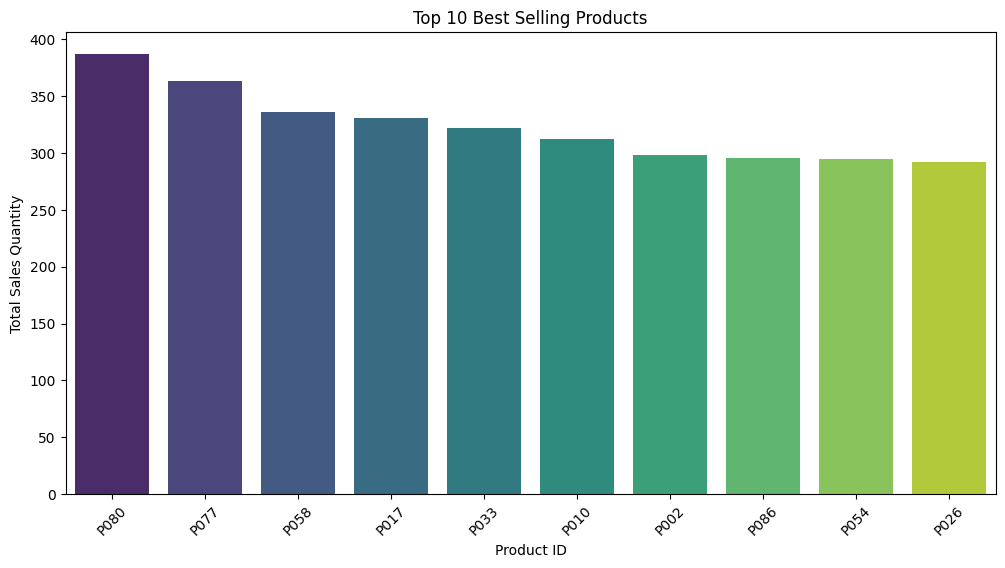

<ipython-input-20-13d125fb402a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=similar_products.index, y=similar_products.values, palette="coolwarm")


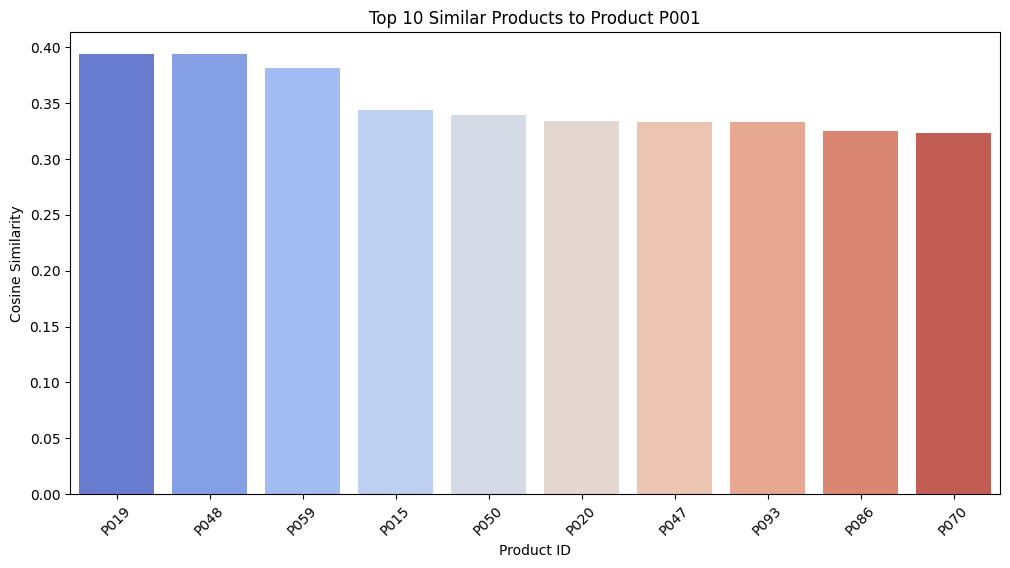

<ipython-input-21-66e1917d603b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=similar_users.index, y=similar_users.values, palette="Blues")


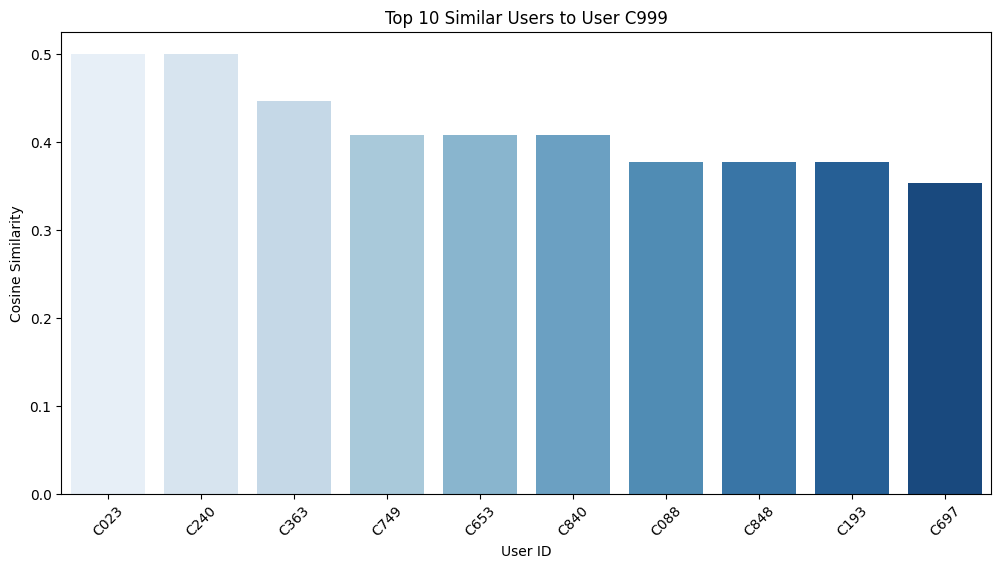

In [23]:
# Visualization Example Usage
plot_top_products()
plot_product_similarity(product_id_example)
plot_user_similarity(user_id_example)
